In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [26]:
X,Y = make_blobs(n_samples=500,centers=2,random_state=11,n_features=2)
print(X.shape,Y.shape)

(500, 2) (500,)


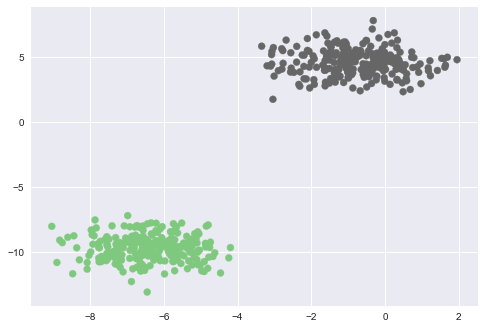

In [27]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [28]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

def predict(X,weights):
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

def loss(X,Y,weights):
    Y_=predict(X,weights)
    cost=np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    Y_=predict(X,weights)
    dw=np.dot(X.T,Y_-Y)
    m=X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=100):
    ones = np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    weights=np.zeros(X.shape[1])
    
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        if epoch%10==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights

    
    

In [29]:
weights=train(X,Y,learning_rate=0.8,maxEpochs=1000)

Epoch 0 Loss 0.0005
Epoch 10 Loss 0.0004
Epoch 20 Loss 0.0004
Epoch 30 Loss 0.0004
Epoch 40 Loss 0.0004
Epoch 50 Loss 0.0004
Epoch 60 Loss 0.0004
Epoch 70 Loss 0.0004
Epoch 80 Loss 0.0003
Epoch 90 Loss 0.0003
Epoch 100 Loss 0.0003
Epoch 110 Loss 0.0003
Epoch 120 Loss 0.0003
Epoch 130 Loss 0.0003
Epoch 140 Loss 0.0003
Epoch 150 Loss 0.0003
Epoch 160 Loss 0.0003
Epoch 170 Loss 0.0003
Epoch 180 Loss 0.0003
Epoch 190 Loss 0.0003
Epoch 200 Loss 0.0002
Epoch 210 Loss 0.0002
Epoch 220 Loss 0.0002
Epoch 230 Loss 0.0002
Epoch 240 Loss 0.0002
Epoch 250 Loss 0.0002
Epoch 260 Loss 0.0002
Epoch 270 Loss 0.0002
Epoch 280 Loss 0.0002
Epoch 290 Loss 0.0002
Epoch 300 Loss 0.0002
Epoch 310 Loss 0.0002
Epoch 320 Loss 0.0002
Epoch 330 Loss 0.0002
Epoch 340 Loss 0.0002
Epoch 350 Loss 0.0002
Epoch 360 Loss 0.0002
Epoch 370 Loss 0.0002
Epoch 380 Loss 0.0002
Epoch 390 Loss 0.0002
Epoch 400 Loss 0.0002
Epoch 410 Loss 0.0002
Epoch 420 Loss 0.0002
Epoch 430 Loss 0.0002
Epoch 440 Loss 0.0002
Epoch 450 Loss 0.0002

In [35]:
def getpredictions(X_Test,weights,labels=True):
    if X_Test.shape[1] != weights.shape[0]:
        ones = np.ones((X_Test.shape[0],1))
        X_Test = np.hstack((ones,X_Test))
    
    probs = predict(X_Test,weights)
    
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs>=0.5] = 1
        return labels

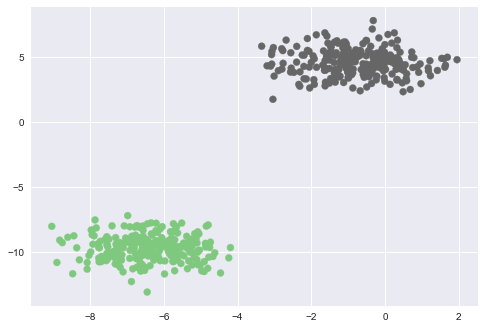

In [36]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [37]:
x1=np.linspace(-8,2,10)
print(x1)

x2=-(weights[0] + weights[1]*x1)/weights[2]
print(x2)

[-8.         -6.88888889 -5.77777778 -4.66666667 -3.55555556 -2.44444444
 -1.33333333 -0.22222222  0.88888889  2.        ]
[ 1.87174875  1.60566147  1.33957419  1.07348691  0.80739963  0.54131235
  0.27522508  0.0091378  -0.25694948 -0.52303676]


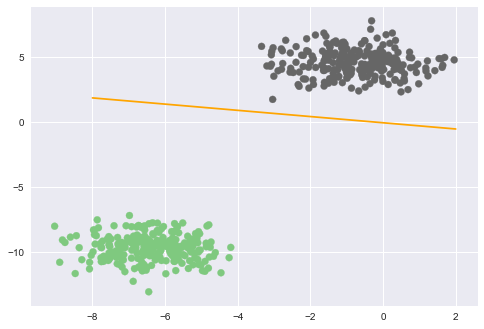

In [38]:
plt.style.use('seaborn')
plt.plot(x1,x2,c='orange')
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [40]:
Y_ = getpredictions(X,weights,labels=True)
trainig_acc = np.sum(Y_==Y)/Y.shape[0]
print(trainig_acc)

1.0
